In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Walker.csv')
df

,user_country,source,content,date
0,321st century,Twitter Web App,"@offbeatorbit @austin_walker ah, fuck",2020-10-22T23:59:55+00:00
1,"Spring, TX",Twitter for iPhone,@AggieAdmin92 @Only1sheleah @Valonia_Walker @A...,2020-10-22T23:59:52+00:00
2,NaN,Twitter for iPhone,@Walker_Albert Pop a barrel then,2020-10-22T23:59:46+00:00
3,London,Twitter Web App,@AquaVelvaBoy @TheLiberatorASM @kfunk937 @immu...,2020-10-22T23:59:42+00:00
4,"McMinnville, TN",Twitter Web App,@Walker_CLE @raw1219 The experience those guys...,2020-10-22T23:59:40+00:00
...,...,...,...,...
1995,NaN,Twitter Web App,"Honestly, she is too uneducated to understand ...",2020-10-22T20:11:06+00:00
1996,"Gulfport, MS",Twitter for iPhone,YEP: Trinity Walker buys OS billboards thankin...,2020-10-22T20:10:57+00:00
1997,NaN,Twitter for Android,@M_83_Walker God that makes me feel old!,2020-10-22T20:10:49+00:00
1998,"Dallas, TX",Twitter for iPhone,Summer Walker be single every other day,2020-10-22T20:10:39+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

55167
['@offbeatorbit', '@austin_walker', 'ah', ',', 'fuck', '@aggieadmin92', '@only1sheleah', '@valonia_walker', '@aldineisd', '@drgoffney', '@katyroede', '@lmamerson', '@comenecint', '@hoffmangreatne1', '@matt_strommer', 'you', 'rock', ',', 'mrs', '.']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 181.10%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

20123
['fuck', 'rock', 'mrs', 'adams', 'pop', 'barrel', 'know', 'moral', 'code', 'sourced', 'elsewhere', 'one', 'true', 'real', 'objective', 'moral', 'code', 'experience', 'guys', 'would']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@jakeeschen', 162),
 ('@janeeopie', 162),
 ('@andrewlazarus4', 162),
 ('@doritmi', 162),
 ('@jkellyca', 162),
 ('@tiochango_', 162),
 ('@badzoot7', 162),
 ('@awithonelison', 162),
 ('@rosewind2007', 162),
 ('@jp_miner', 162),
 ('@mcfunny', 162),
 ('@sheldon_walker_', 162),
 ('@takethatcdc', 162),
 ('@wendyorent', 162),
 ('@boxmenot', 162),
 ('@fiski70', 162),
 ('@tthoughtmonger', 162),
 ('@_mamadeb', 161),
 ('@monstercoyliar', 160),
 ('@kfunk937', 153)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,321st century,Twitter Web App,"@offbeatorbit @austin_walker ah, fuck",2020-10-22T23:59:55+00:00,Negative
1,"Spring, TX",Twitter for iPhone,@AggieAdmin92 @Only1sheleah @Valonia_Walker @A...,2020-10-22T23:59:52+00:00,Neutral
2,NaN,Twitter for iPhone,@Walker_Albert Pop a barrel then,2020-10-22T23:59:46+00:00,Neutral
3,London,Twitter Web App,@AquaVelvaBoy @TheLiberatorASM @kfunk937 @immu...,2020-10-22T23:59:42+00:00,Positive
4,"McMinnville, TN",Twitter Web App,@Walker_CLE @raw1219 The experience those guys...,2020-10-22T23:59:40+00:00,Positive
...,...,...,...,...,...
1995,NaN,Twitter Web App,"Honestly, she is too uneducated to understand ...",2020-10-22T20:11:06+00:00,Negative
1996,"Gulfport, MS",Twitter for iPhone,YEP: Trinity Walker buys OS billboards thankin...,2020-10-22T20:10:57+00:00,Neutral
1997,NaN,Twitter for Android,@M_83_Walker God that makes me feel old!,2020-10-22T20:10:49+00:00,Positive
1998,"Dallas, TX",Twitter for iPhone,Summer Walker be single every other day,2020-10-22T20:10:39+00:00,Negative


In [11]:
df.sentiment.value_counts()

Neutral     833
Positive    832
Negative    335
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 41.60%
Percentage of neutral tweets: 41.65%
Percentage of negative tweets: 16.75%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

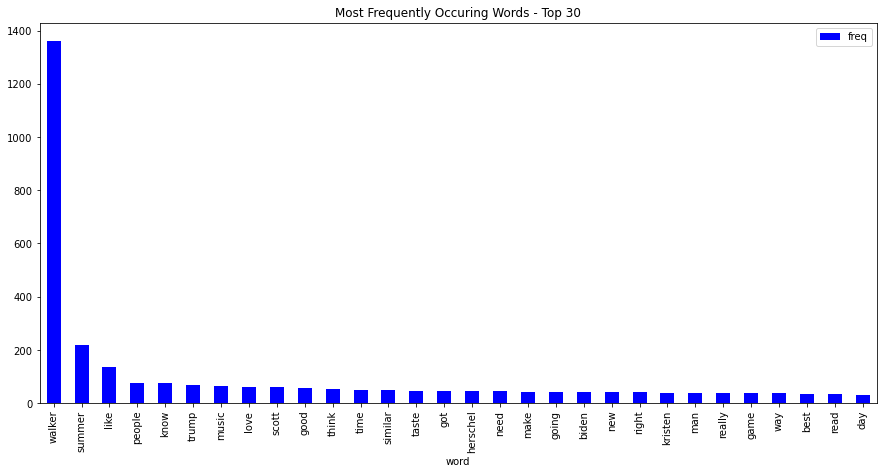

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

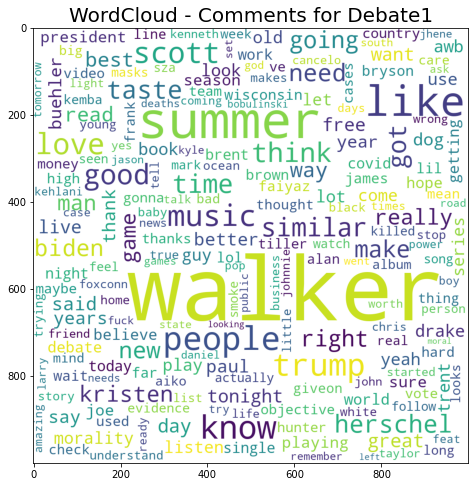

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

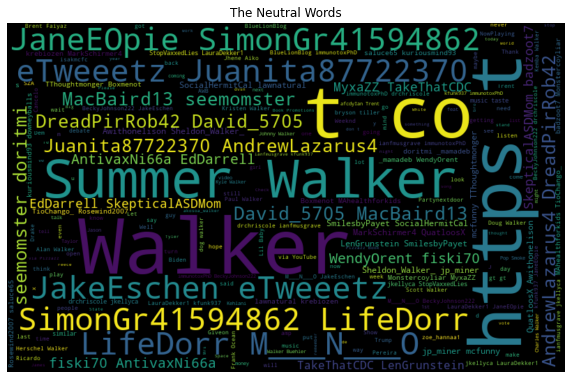

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

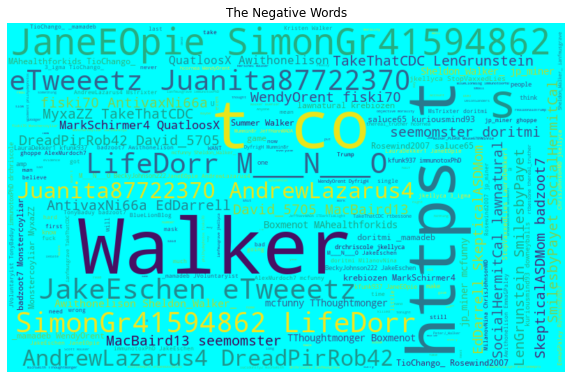

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

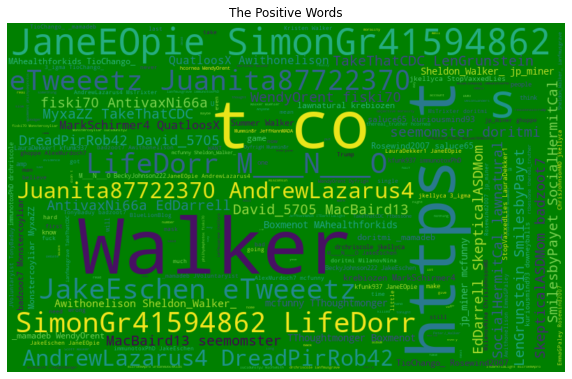

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,"@offbeatorbit @austin_walker ah, fuck",Negative
1,@AggieAdmin92 @Only1sheleah @Valonia_Walker @A...,Neutral
2,@Walker_Albert Pop a barrel then,Neutral
3,@AquaVelvaBoy @TheLiberatorASM @kfunk937 @immu...,Positive
4,@Walker_CLE @raw1219 The experience those guys...,Positive
...,...,...
1995,"Honestly, she is too uneducated to understand ...",Negative
1996,YEP: Trinity Walker buys OS billboards thankin...,Neutral
1997,@M_83_Walker God that makes me feel old!,Positive
1998,Summer Walker be single every other day,Negative


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Negative,walker ah fuck
1,Neutral,walker strommer you rock mrs adams
2,Neutral,albert pop a barrel then
3,Positive,igma mamadeb miner walker truther but how do y...
4,Positive,cle the experience those guys would have would...
...,...,...
1995,Negative,honestly she is too uneducated to understand w...
1996,Neutral,yep trinity walker buys os billboards thanking...
1997,Positive,walker god that makes me feel old
1998,Negative,summer walker be single every other day


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
3,Positive,igma mamadeb miner walker truther but how do y...
4,Positive,cle the experience those guys would have would...
9,Positive,so is chris walker gonna cut the mic every tim...
14,Positive,cle they have lots of former madden players an...
18,Positive,march light by john walker
...,...,...
1987,Negative,walker ain t black if that s what he thinks
1991,Negative,everyone should listen to this a terrifying fi...
1993,Negative,for the love of god please tell kristen walker...
1995,Negative,honestly she is too uneducated to understand w...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
3,1,igma mamadeb miner walker truther but how do y...
4,1,cle the experience those guys would have would...
9,1,so is chris walker gonna cut the mic every tim...
14,1,cle they have lots of former madden players an...
18,1,march light by john walker
...,...,...
1987,0,walker ain t black if that s what he thinks
1991,0,everyone should listen to this a terrifying fi...
1993,0,for the love of god please tell kristen walker...
1995,0,honestly she is too uneducated to understand w...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(875, 2)
(292, 2)


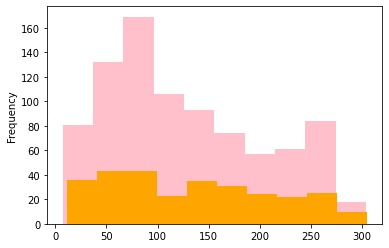

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(266899, 420320)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('president', 0.8712890148162842),
 ('biden', 0.846110463142395),
 ('kristen', 0.8218886852264404),
 ('donald', 0.8179008960723877),
 ('women', 0.8110095262527466),
 ('bobulinski', 0.7851977348327637),
 ('joe', 0.7647035121917725),
 ('guy', 0.7635883688926697),
 ('moderator', 0.7630085349082947),
 ('minutes', 0.7627015113830566)]

In [37]:
model_w2v.wv.most_similar(negative = "trump")

[('cases', -0.37856990098953247),
 ('has', -0.43075811862945557),
 ('our', -0.4392474293708801),
 ('sf', -0.4452313482761383),
 ('crime', -0.45052897930145264),
 ('series', -0.45556309819221497),
 ('kindleunlimited', -0.45865198969841003),
 ('read', -0.459046870470047),
 ('than', -0.4624406695365906),
 ('dakota', -0.4675392210483551)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(875, 500)
(875,)
(292, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.5684931506849316
F1 score : 0.6648936170212766
[[ 41  36]
 [ 90 125]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9931428571428571
Validation Accuracy : 0.6335616438356164
f1 score : 0.7540229885057471
[[ 21  56]
 [ 51 164]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.4897260273972603
f1 score : 0.565597667638484
[[ 46  31]
 [118  97]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9051428571428571
Validation Accuracy : 0.7397260273972602
f1 score : 0.849802371541502
[[  1  76]
 [  0 215]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 walker look sharp 

First sample after preprocessing: 
 [  1 160   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6494 - accuracy: 0.6963 - val_loss: 0.6004 - val_accuracy: 0.7273
Epoch 2/20
7/7 - 1s - loss: 0.6207 - accuracy: 0.7027 - val_loss: 0.5894 - val_accuracy: 0.7273
Epoch 3/20
7/7 - 1s - loss: 0.6105 - accuracy: 0.7027 - val_loss: 0.6046 - val_accuracy: 0.7273
Epoch 4/20
7/7 - 1s - loss: 0.6057 - accuracy: 0.7027 - val_loss: 0.6025 - val_accuracy: 0.7273
Epoch 5/20
7/7 - 1s - loss: 0.6031 - accuracy: 0.7027 - val_loss: 0.5931 - val_accuracy: 0.7273
Epoch 6/20
7/7 - 1s - loss: 0.5964 - accuracy: 0.7027 - val_loss: 0.5872 - val_accuracy: 0.7273
Epoch 7/20
7/7 - 1s - loss: 0.5905 - accuracy: 0.7027 - val_loss: 0.5826 - val_accuracy: 0.7273
Epoch 8/20
7/7 - 1s - loss: 0.5749 - accuracy: 0.7027 - val_loss: 0.5784 - val_accuracy: 0.7273
Epoch 9/20
7/7 - 1s - loss: 0.5529 - accuracy: 0.7027 - val_loss: 0.5679 - val_accuracy: 0.7273
Epoch 10/20
7/7 - 1s - loss: 0.5216 - accuracy: 0.7027 - val_loss: 0.5604 - val_accuracy: 0.7273
Epoch 11/20
7/7 - 1s - loss: 0.4775 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,0,walker ah fuck
1,-1,walker strommer you rock mrs adams
2,-1,albert pop a barrel then
3,1,igma mamadeb miner walker truther but how do y...
4,1,cle the experience those guys would have would...
...,...,...
1995,0,honestly she is too uneducated to understand w...
1996,-1,yep trinity walker buys os billboards thanking...
1997,1,walker god that makes me feel old
1998,0,summer walker be single every other day


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9906666666666667
Validation Accuracy : 0.554
F1 score : [0.60850112 0.05769231 0.61469933]
[[136   6  60]
 [ 44   3  45]
 [ 65   3 138]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8986666666666666
Validation Accuracy : 0.492
f1 score : [0.51744186 0.23783784 0.57324841]
[[ 89  34  79]
 [ 19  22  51]
 [ 34  37 135]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9906666666666667
Validation Accuracy : 0.454
f1 score : [0.53023256 0.1595092  0.49140049]
[[114  27  61]
 [ 39  13  40]
 [ 75  31 100]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.84
Validation Accuracy : 0.556
f1 score : [0.61650485 0.         0.60887097]
[[127   0  75]
 [ 28   0  64]
 [ 55   0 151]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 0, 1]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['is summer walker london still relationship goals ladies lol', 'accident has been moved to the right shoulder in dallas on i e nb at walnut hl ln stop and go traffic back to lp walton walker dfwtraffic', 'walker edison furniture company mid century modern wood queen platform bed frame bedroom grey gifts giftideas shopping household holiday blackfriday thanksgiving cybermonday amazon primeday', 'n o mamadeb walker miner and they re not killing as many patients with ventilators like they did in the beginning', 'imbald she wouldn t have been able to leave the bus stomped the fuck outta her right where she stood spitting i m lying i don t beat women i would ve shot her in self defense lmfao', 'what has kristen walker ever done that makes her so bad specifics please you got nothing but false allegations', 'trent ricardo walker awb', 'rt like if u listen to music edition harry styles d sza the killers girl in red the neighbourhood ariana grande shawn men

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.3881 - accuracy: 0.1593 - val_loss: 0.1380 - val_accuracy: 0.1800
Epoch 2/20
11/11 - 2s - loss: -9.4165e-03 - accuracy: 0.1600 - val_loss: -8.5984e-02 - val_accuracy: 0.1800
Epoch 3/20
11/11 - 2s - loss: -2.7061e-02 - accuracy: 0.1600 - val_loss: -1.8293e-01 - val_accuracy: 0.1800
Epoch 4/20
11/11 - 2s - loss: -9.8800e-02 - accuracy: 0.1600 - val_loss: -3.1970e-01 - val_accuracy: 0.1800
Epoch 5/20
11/11 - 2s - loss: -3.1139e-01 - accuracy: 0.1600 - val_loss: -7.5159e-01 - val_accuracy: 0.1800
Epoch 6/20
11/11 - 2s - loss: -1.0084e+00 - accuracy: 0.1600 - val_loss: -1.7822e+00 - val_accuracy: 0.1800
Epoch 7/20
11/11 - 2s - loss: -2.6339e+00 - accuracy: 0.1607 - val_loss: -4.5224e+00 - val_accuracy: 0.2067
Epoch 8/20
11/11 - 2s - loss: -6.6650e+00 - accuracy: 0.1711 - val_loss: -1.0408e+01 - val_accuracy: 0.2600
Epoch 9/20
11/11 - 2s - loss: -1.5674e+01 - accuracy: 0.2022 - val_loss: -2.2679e+01 - val_accuracy: 0.2467
Epoch 10/20
11/11 - 2s - loss: -3.2278